In [70]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
# from matplotlib import rc
from IPython.display import display, Image

import math
import pandas as pd
import numpy as np
# import seaborn as sns

from sklearn.neural_network import MLPClassifier

def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

## Problem 1.1

*Universal Approximation Theorem states that a single-layer neural network
(NN) can be used to approximate any continuous function within certain precision.
For any function with one input x and one output f(x), one way to
approximate it is to construct several ”bumps” as shown in Fig. 1a.*

### (a)
*Assuming sigmoid activation function is used, design a single layer NN with one input and one output to approximate the bump function shown in Fig. 1b. An example of a reasonable approximation using a single layer NN is show in in Fig. 1c. Try to replicate it as closely as possible. *

sig (100, 2) * (2, 2) = (100, 2)
lin (100, 2) * (2, 1) = (20, 2)


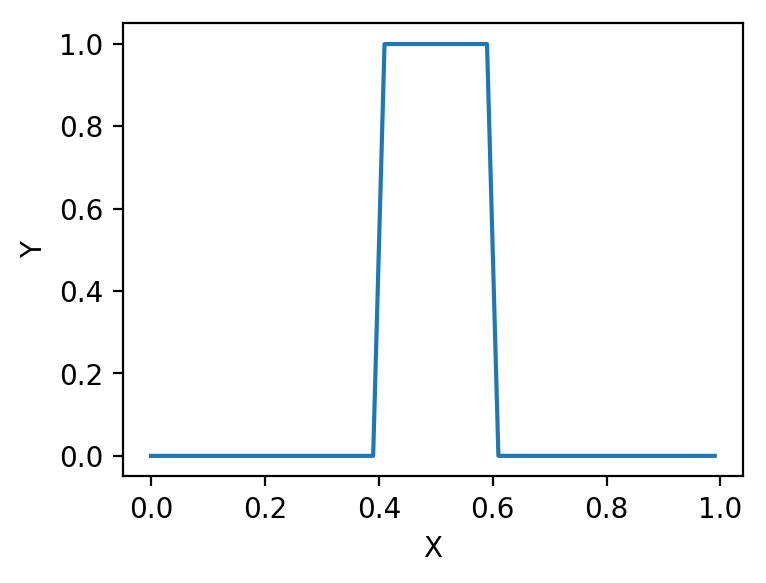

In [170]:
## INPUT LAYER ##

t = 0.01
X = np.matrix(np.arange(0,1,t)).T
L0 = np.hstack((X, np.ones((len(X),1)))) # Bias column


## LAYER 1 ##

w1, w2 = 1000, -1000 # Slopes
b1, b2 = 0.4, 0.6 # Intercepts

W0 = np.array([[w1, w2], [-b1*w1, -b2*w2]])

L1 = sig(np.dot(L0,W0))

print 'sig',L0.shape,'*',W0.shape,'=',L1.shape


## OUTPUT LAYER ##

a1, a2 = 1.0, 1.0
b = -1
W1 = np.array([[a,a]]).T

Y = np.dot(L1,W1) + b

print 'lin',L1.shape,'*',W1.shape,'=',L2.shape


## PLOT IT ##

fig = plt.figure(figsize=(4,3), dpi=200)
plt.plot(X, Y, label='Y')
plt.xlabel('X'); plt.ylabel('Y')
plt.show()

### (b)



## Problem 1.2

[[  1.00000000e+03  -1.00000000e+03]
 [  1.00000000e-03   1.00000000e-03]
 [ -3.00000000e+02   7.00000000e+02]]
sig (100, 3) * (3, 2) = (100, 2)
lin (100, 2) * (2, 2) = (100, 2)


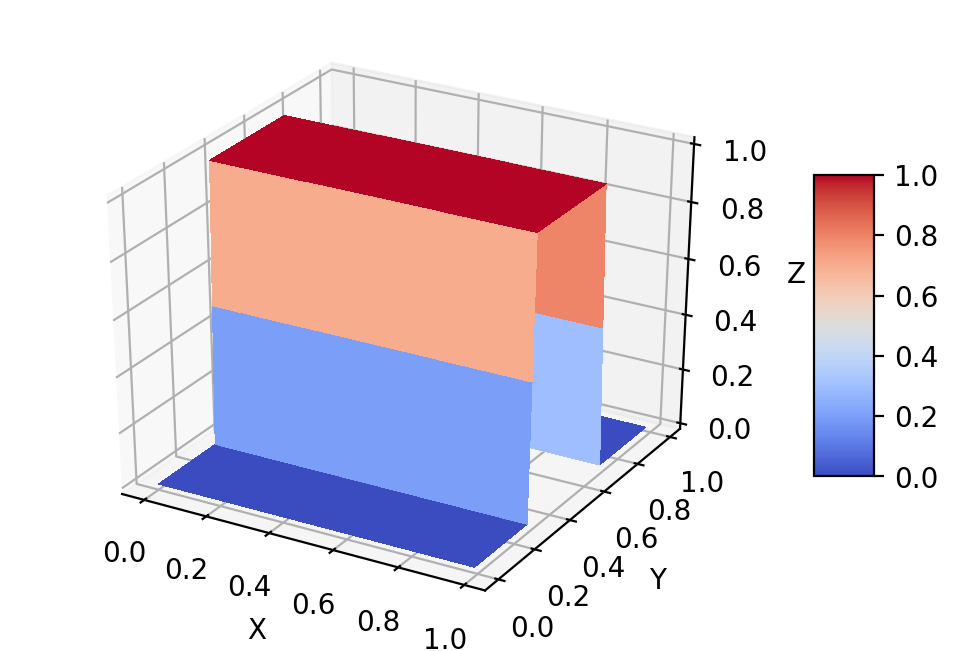

In [184]:
t = 0.01

## INPUT LAYER ##

x = np.matrix(np.arange(0,1,t)).T
y = np.matrix(np.arange(0,1,t)).T

L0 = np.hstack((x, y, np.ones((len(x),1))))


## LAYER 1 ## 

w11, w12 = 1000, -1000 # Slopes
w21, w22 = 0.001, 0.001
b1, b2 = 0.3, 0.7 # Intercepts

W0 = np.array([[w11, w12], [w21, w22], [-b1*w11, -b2*w12]])

L1 = sig(np.dot(L0,W0))

print 'sig',L0.shape,'*',W0.shape,'=',L1.shape


## LAYER 2 ## 

a1, a2 = 1.0, 0.001 # Weights
b1, b2 = -1.0, 1.0 # Bias

W1 = np.array([[a1,a1],[a2,a2]]).T

L2 = np.dot(L1,W1) + [b1,b2]

print 'lin',L1.shape,'*',W1.shape,'=',L2.shape

X, Y = np.meshgrid(x, y)
Z = np.dot(L2[:,0], L2[:,1].T)


## PLOT IT ##

fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

[[  1.00000000e+03  -1.00000000e+03]
 [  1.00000000e-03   1.00000000e-03]
 [ -4.00000000e+02   6.00000000e+02]]
(100, 3) (3, 2)


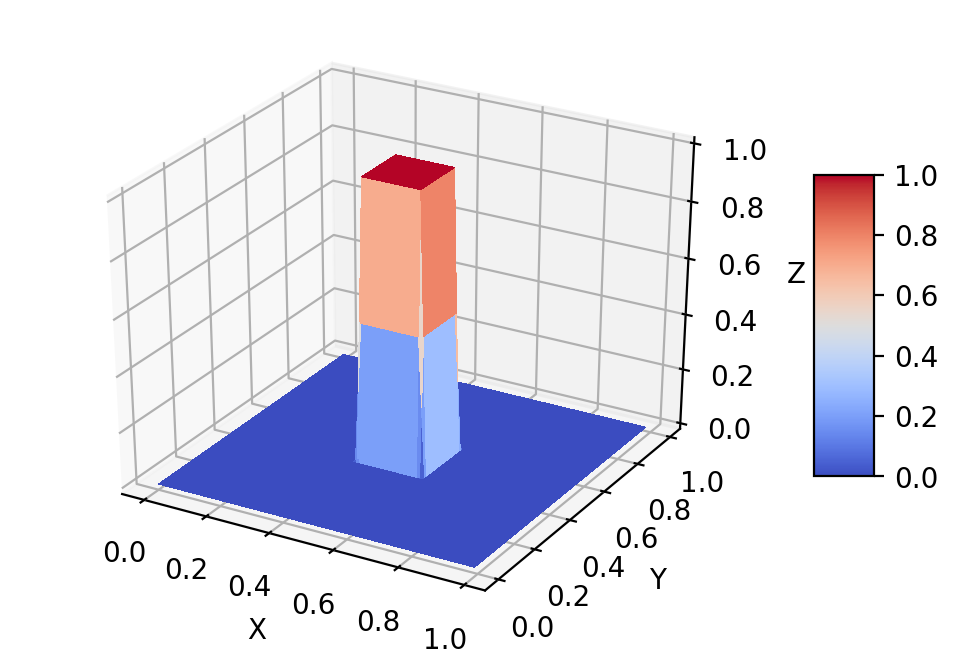

In [182]:
## INPUT LAYER ##

t = 0.01
x = np.matrix(np.arange(0,1,t)).T
y = np.matrix(np.arange(0,1,t)).T
L0 = np.hstack((x, y, np.ones((len(x),1))))


## LAYER 1 ##

w11, w12 = 1000, -1000 # Slopes
w21, w22 = 0.001, 0.001 
b1, b2 = 0.4, 0.6 # Intercepts
W0 = np.array([[w11, w12], [w21, w22], [-b1*w11, -b2*w12]])

L1 = sig(np.dot(L0,W0))

print 'sig',L0.shape,'*',W0.shape,'=',L1.shape


## LAYER 2 ##

a1, a2 = 1.0, 1.0
b1, b2 = -1, -1
W1 = np.array([[a1,a1],[a2,a2]]).T

L2 = np.dot(L1,W1) + [b1,b2]

print 'lin',L1.shape,'*',W1.shape,'=',L2.shape


## OUTPUT LAYER ##

X, Y = np.meshgrid(x, y)
Z = np.dot(L2[:,0], L2[:,1].T)


## PLOT IT ##

fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [185]:
# print np.arange(0,1,0.1)
# print np.linspace(0, 1, 10)